# Medical Cost Personal Exploratory Data Analysis

## Initial configuration

### Install libraries

In [258]:
!pip install --upgrade pip
!pip install numpy pandas matplotlib seaborn empiricaldist statsmodels sklearn pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import libraries

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import empiricaldist
import janitor

### Graphs appareance

In [260]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (10, 8)

## Data validation

### Load dataset

In [261]:
url = 'https://raw.githubusercontent.com/camilogranda/Students-mental-health-data-analysis/main/medical-cost-personal.csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Dataset information

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Data cleaning

In [263]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

#### Convert data types

In [264]:
df = df.astype({'sex': 'category', 'smoker': 'category', 'region': 'category'})
print(df.dtypes)
print()
print(df.dtypes.value_counts())

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

int64       2
float64     2
category    1
category    1
category    1
dtype: int64


#### Number of observations (rows)

In [265]:
df.shape

(1338, 7)

# Univariate Analysis

## Descriptive Statistics

In [266]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Basic descriptive statistics

In [267]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Numeric only

In [268]:
df.describe(include=[np.number])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Categoric only

In [269]:
df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Categorical variables count visualization

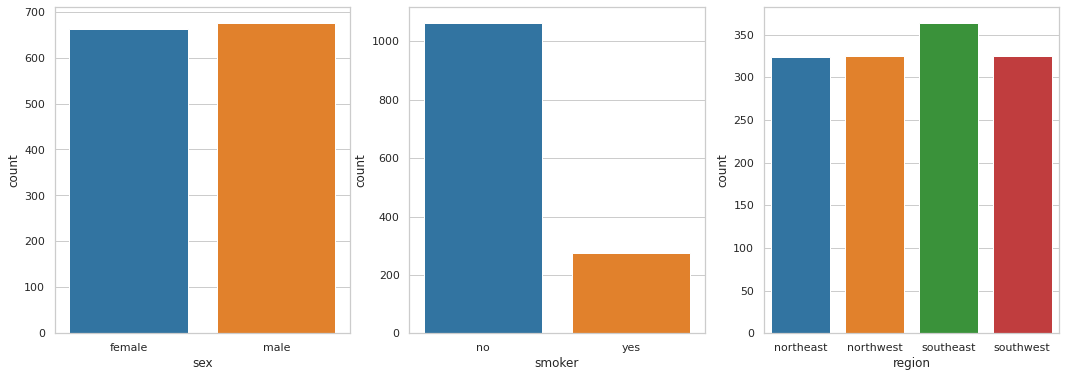

In [270]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
sns.countplot(ax=ax[0],data=df,x='sex')
sns.countplot(ax=ax[1],data=df,x='smoker')
sns.countplot(ax=ax[2],data=df,x='region')
plt.show()

In [271]:
df.select_dtypes('category').columns

Index(['sex', 'smoker', 'region'], dtype='object')

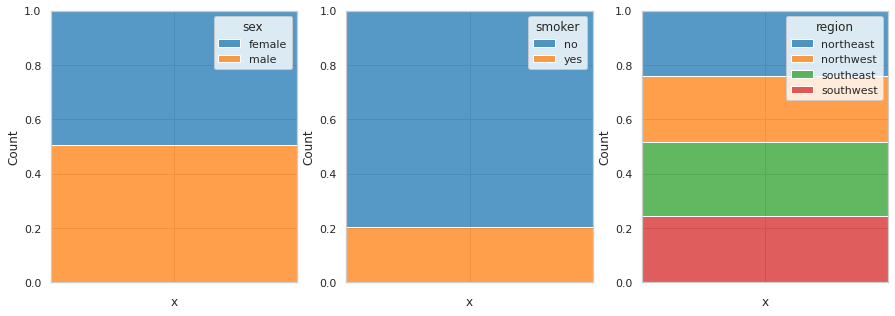

In [272]:
categ_cols = df.select_dtypes('category').columns
fig, ax = plt.subplots(1,3,figsize=(15,5))


for i in range(len(categ_cols)):
  (
      df
      .add_column('x','')
      .pipe(
          lambda df: (
              sns.histplot(ax=ax[i], data=df, x='x', hue=categ_cols[i], multiple='fill'))))

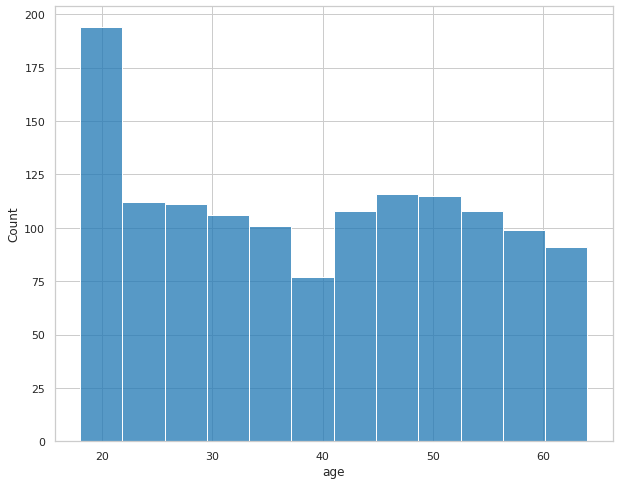

In [273]:
sns.histplot(data=df, x='age')

## Central tendency measures

In [274]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [275]:
print('Mean: \n', df.mean(numeric_only=True))
print()
print('Median: \n', df.median(numeric_only=True))
print()
print('Mode: \n', df.mode())

Mean: 
 age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

Median: 
 age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

Mode: 
    age   sex   bmi  children smoker     region    charges
0   18  male  32.3         0     no  southeast  1639.5631


## Measures of dispersion

### Max value

In [276]:
df.min(numeric_only=True)

age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64

### Min value

In [277]:
df.max(numeric_only=True)

age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64

### Range

In [278]:
df.max(numeric_only=True) - df.min(numeric_only=True)

age            46.00000
bmi            37.17000
children        5.00000
charges     62648.55411
dtype: float64

### Standard deviation

In [279]:
df.std(numeric_only=True)

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

### Quartiles

In [280]:
median = df.quantile(q=0.50)
q1 = df.quantile(q=0.25)
q3 = df.quantile(q=0.75)
iqr = q3 - q1

In [281]:
(
    df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        IQR=lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,IQR
0,age,51.000000,39.000,27.00000,24.000000
1,bmi,34.693750,30.400,26.29625,8.397500
2,children,2.000000,1.000,0.00000,2.000000
3,charges,16639.912515,9382.033,4740.28715,11899.625365


### Outlier detection limits

In [282]:
min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr
print('Outlier detection lower limit: \n', min_limit)
print()
print('Outlier detection upper limit: \n', max_limit)

Outlier detection lower limit: 
 age            -9.000000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64

Outlier detection upper limit: 
 age            87.000000
bmi            47.290000
children        5.000000
charges     34489.350562
dtype: float64


### Data distribution

In [283]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

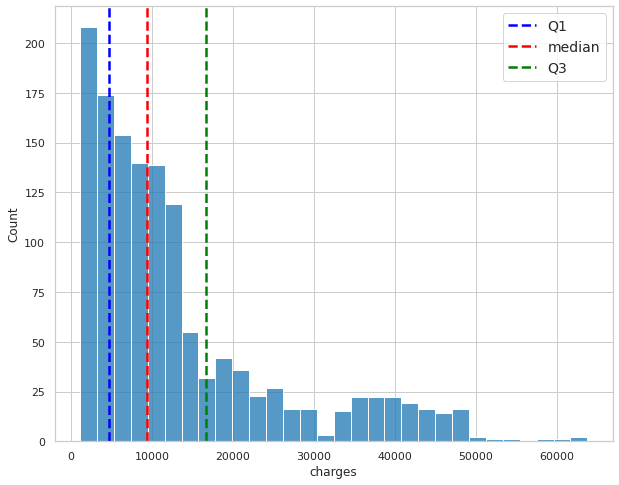

In [284]:
quantiles = [0.25, 0.50, 0.75]
colors = ['blue', 'red', 'green']
q_names = ['Q1', 'median', 'Q3']

sns.histplot(data=df, x='charges')

for i in range(len(quantiles)):

  plt.axvline(x=df.charges.quantile(quantiles[i]),color=colors[i],linestyle='dashed',linewidth=2.5,label=(q_names[i]))
  plt.legend(fontsize=14)

#### Bin width

In [285]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)
  
freedman_diaconis_bindwidth(df)

age            2.277141
bmi            0.796762
children       0.189762
charges     1129.046685
dtype: float64

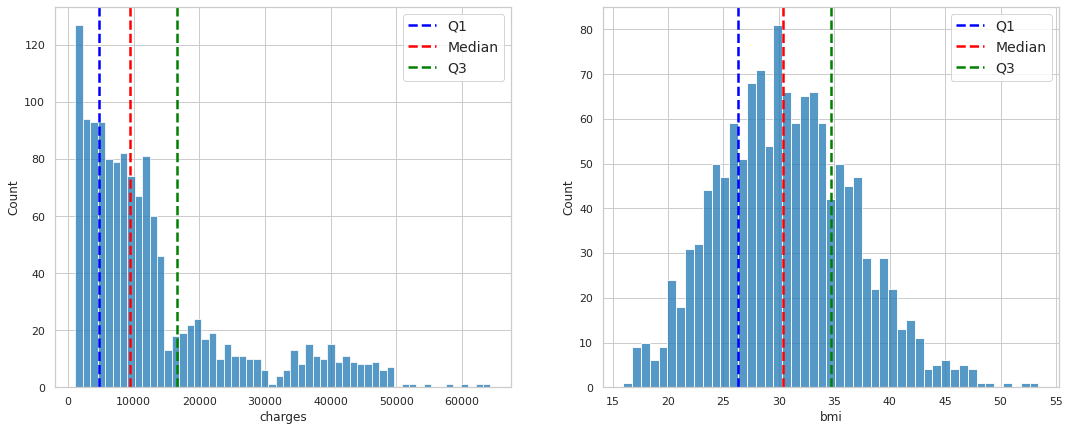

In [286]:
binwidth = [freedman_diaconis_bindwidth(df)[3], 
            freedman_diaconis_bindwidth(df)[1]]
quantiles = [0.25, 0.50, 0.75]
colors = ['blue', 'red', 'green']
q_names = ['Q1', 'Median', 'Q3']
cols = ['charges', 'bmi']
subplots = (121,122)

plt.figure(figsize=(18,7))

for i in range(len(cols)):
  plt.subplot(subplots[i])
  sns.histplot(data=df,x=cols[i],binwidth=binwidth[i])

  for j in range(len(quantiles)):

    plt.axvline(x=df[cols[i]].quantile(quantiles[j]),color=colors[j],linestyle='dashed',linewidth=2.5,label=(q_names[j]))
    plt.legend(fontsize=14)

plt.show()

## Probability Mass Function (PMF)

In [287]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

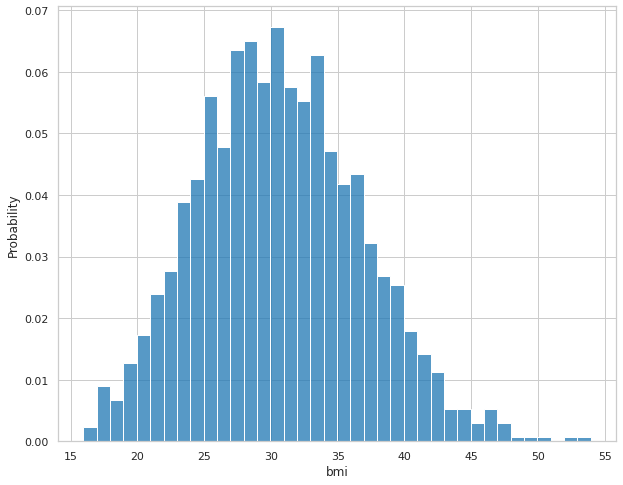

In [288]:
sns.histplot(data=df,x='bmi',binwidth=1,stat='probability')

#### With empiricaldist

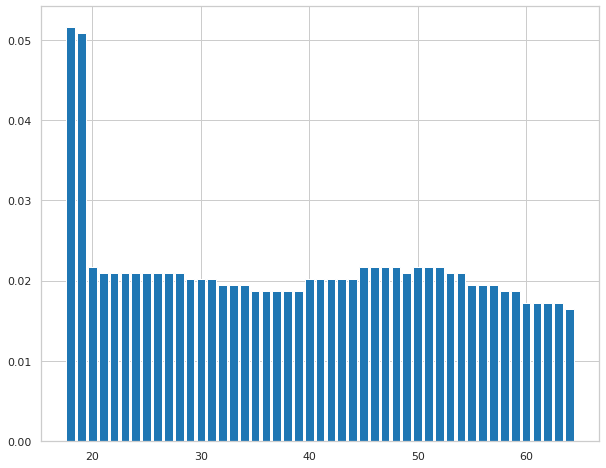

In [289]:
pmf_age = empiricaldist.Pmf.from_seq(df.age, normalize=True)
pmf_age.bar()

In [290]:
pmf_age(19)

0.05082212257100149

## Empirical Cumulative Density Function (ECDF)

### Using Seaborn

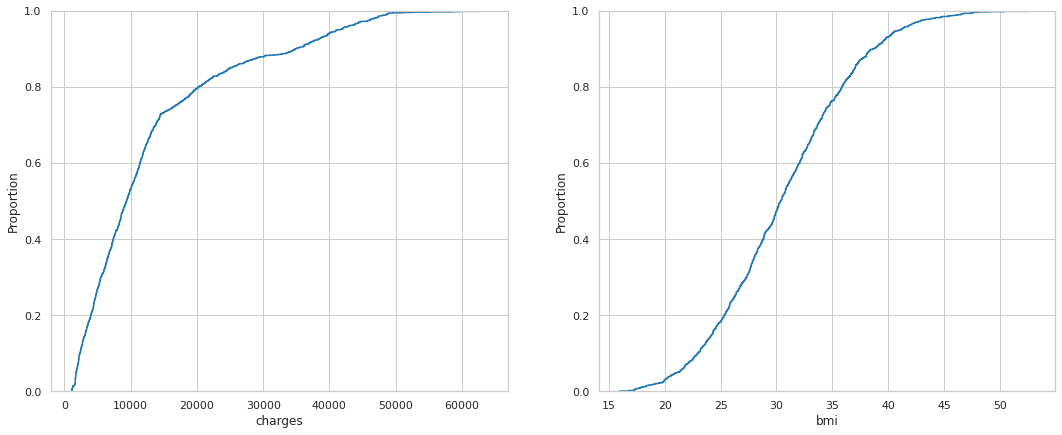

In [291]:
plt.figure(figsize=(18,7))
plt.subplot(121)
sns.ecdfplot(data=df, x='charges')
plt.subplot(122)
sns.ecdfplot(data=df, x='bmi')

### Using empiricaldist

In [292]:
def decorate_cdf(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Quantity')
    plt.ylabel('CDF')
    plt.title(title)

In [293]:
cdf_charges = empiricaldist.Cdf.from_seq(df.charges, normalize=True)
cdf_bmi = empiricaldist.Cdf.from_seq(df.bmi, normalize=True)

In [294]:
pmf_charges = empiricaldist.Pmf.from_seq(df.charges, normalize=True)
pmf_bmi = empiricaldist.Pmf.from_seq(df.bmi, normalize=True)

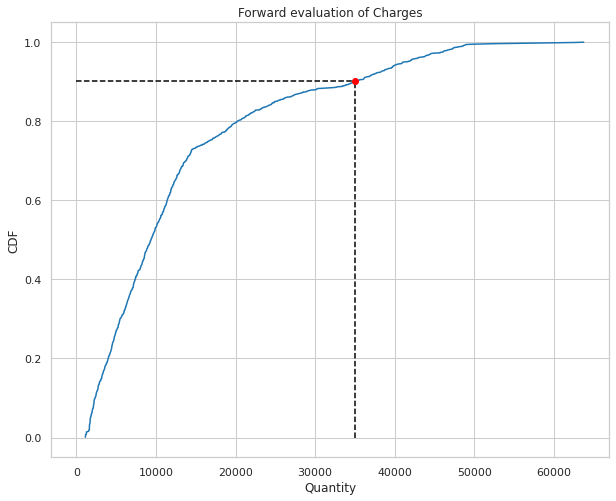

In [295]:
# quantity
q = 35000
# Probability
p = cdf_charges.forward(q)

cdf_charges.plot()

plt.vlines(x=q, ymin=0, ymax=p, color='black', linestyle='dashed')
plt.hlines(y=p, xmin=pmf_charges, xmax=q, color='black', linestyle='dashed')
plt.plot(q, p, 'ro')

decorate_cdf('Forward evaluation of Charges')
plt.show()

### Finding quartiles from a CDF

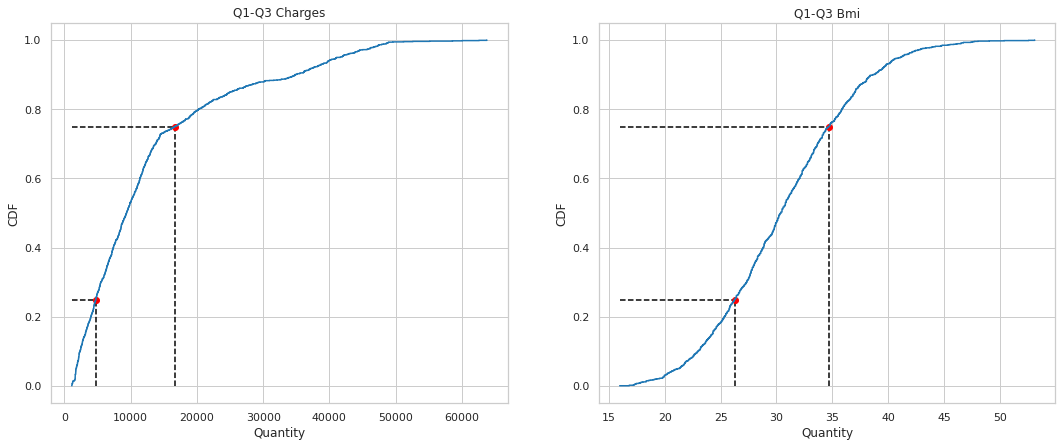

In [296]:
pmfs = (pmf_charges.qs, pmf_bmi.qs)
cdfs = (cdf_charges, cdf_bmi)
subplot = (121,122)
titles = ('Q1-Q3 Charges', 'Q1-Q3 Bmi')
ps = (0.25, 0.75)

plt.figure(figsize=(18,7))
for i in range(len(pmfs)):

  plt.subplot(subplot[i])
  cdfs[i].step()
  decorate_cdf(titles[i])
  qs = cdfs[i].inverse(ps) # quantities

  plt.vlines (x = qs, ymin = 0, ymax=ps, color='black', linestyle='dashed')
  plt.hlines(y=ps, xmin=pmfs[i][0], xmax=qs, color='black', linestyle='dashed')
  plt.scatter(x=qs, y=ps, color='red', zorder=2)

plt.show()

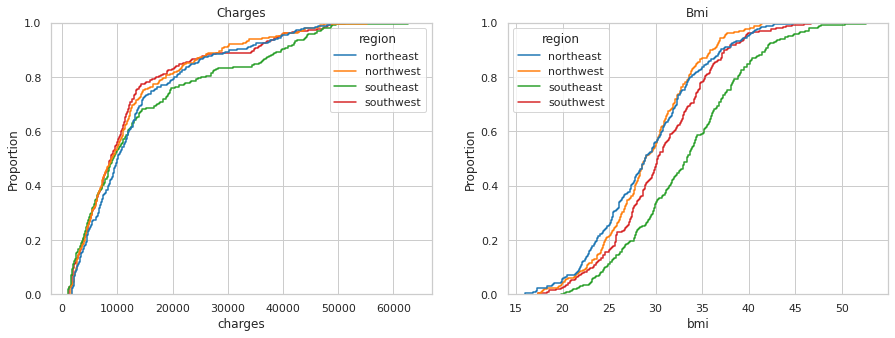

In [297]:
x = ('charges', 'bmi')
subplot = (121,122)

plt.figure(figsize=(15,5))
for i in range(len(x)):
  plt.subplot(subplot[i])
  sns.ecdfplot(data=df, x=x[i], hue='region')
  plt.title(x[i].capitalize())

## Probability Density Function

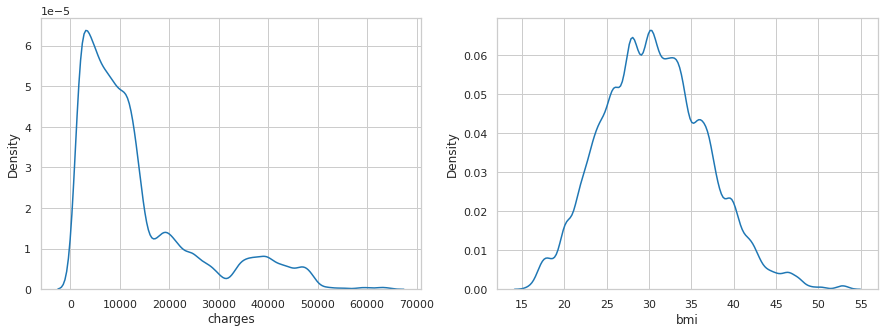

In [298]:
x = ('charges', 'bmi')
subplot = (121,122)
plt.figure(figsize=(15,5))

for i in range(len(x)):
  plt.subplot(subplot[i])
  sns.kdeplot(data=df, x=x[i], bw_method=0.1)

# Bivariate data analysis

### Filter dataframe by "smoker"

In [356]:
df[df['smoker'] == 'no'].describe()


,age,bmi,children,charges,numeric_smoker
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.0
mean,39.385338,30.651795,1.090226,8434.268298,0.0
std,14.083410,6.043111,1.218136,5993.781819,0.0
min,18.000000,15.960000,0.000000,1121.873900,0.0
25%,26.750000,26.315000,0.000000,3986.438700,0.0
50%,40.000000,30.352500,1.000000,7345.405300,0.0
75%,52.000000,34.430000,2.000000,11362.887050,0.0
max,64.000000,53.130000,5.000000,36910.608030,0.0


In [357]:
df[df['smoker'] == 'yes'].describe()

,age,bmi,children,charges,numeric_smoker
count,274.000000,274.000000,274.000000,274.000000,274.0
mean,38.514599,30.708449,1.113139,32050.231832,1.0
std,13.923186,6.318644,1.157066,11541.547176,0.0
min,18.000000,17.195000,0.000000,12829.455100,1.0
25%,27.000000,26.083750,0.000000,20826.244213,1.0
50%,38.000000,30.447500,1.000000,34456.348450,1.0
75%,49.000000,35.200000,2.000000,41019.207275,1.0
max,64.000000,52.580000,5.000000,63770.428010,1.0


<function matplotlib.pyplot.show(*args, **kw)>

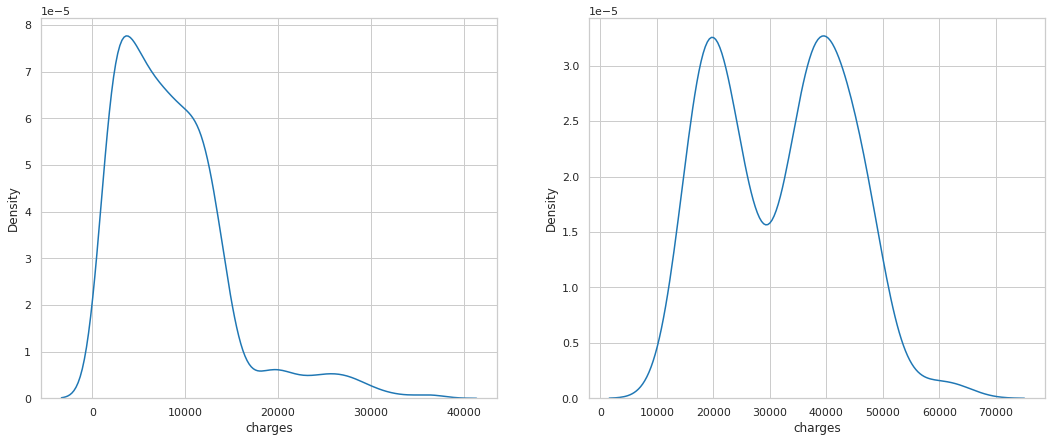

In [348]:
plt.figure(figsize=(18,7))
plt.subplot(121)
sns.kdeplot(data=df[df['smoker'] == 'no'], x='charges')
plt.subplot(122)
sns.kdeplot(data=df[df['smoker'] == 'yes'], x='charges')
plt.show

## Scatter plots

In [299]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


### Charges and bmi

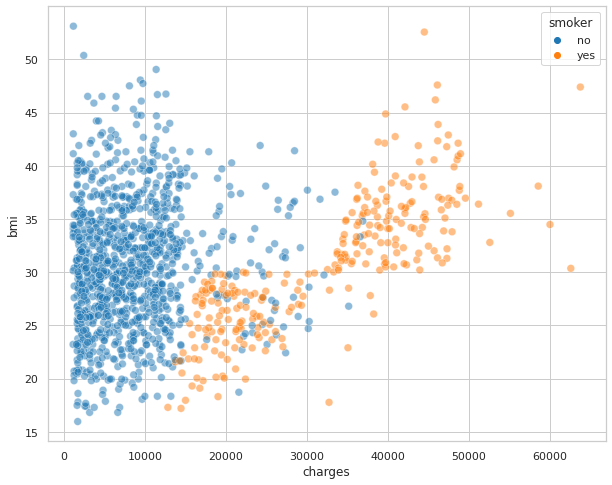

In [300]:
sns.scatterplot(data=df, x='charges', y='bmi',hue='smoker', alpha=0.5, s=60)

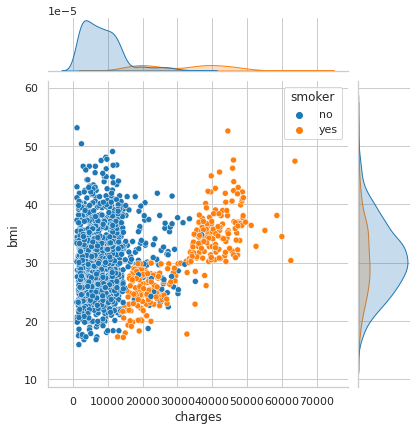

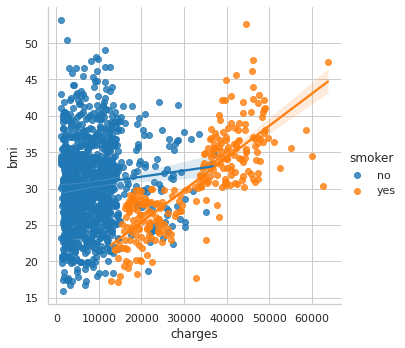

In [301]:
sns.jointplot(data=df, x='charges', y='bmi', hue='smoker')
sns.lmplot(data=df, x='charges', y='bmi', hue='smoker')

### Charges and age

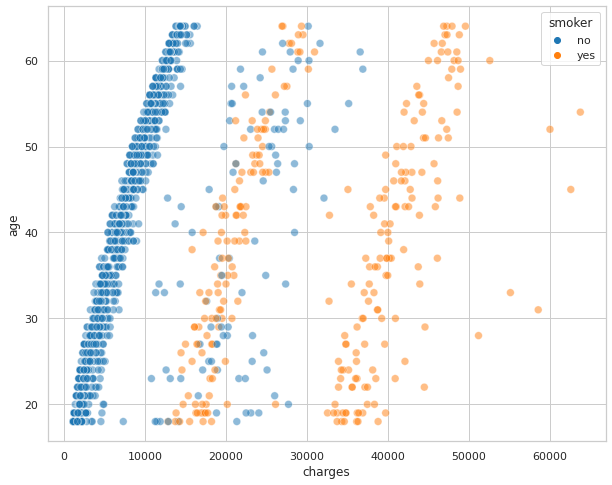

In [302]:
sns.scatterplot(data=df, x='charges', y='age', hue='smoker', alpha=0.5, s=60)

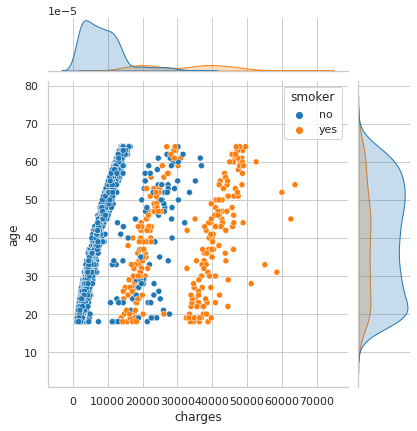

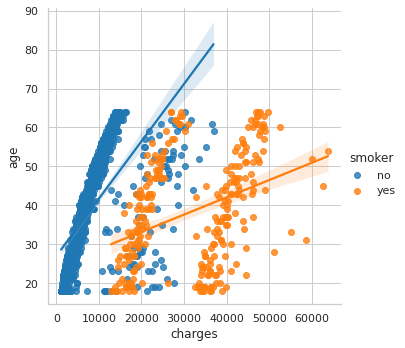

In [303]:
sns.jointplot(data=df, x='charges', y='age', hue='smoker')
sns.lmplot(data=df, x='charges', y='age', hue='smoker')

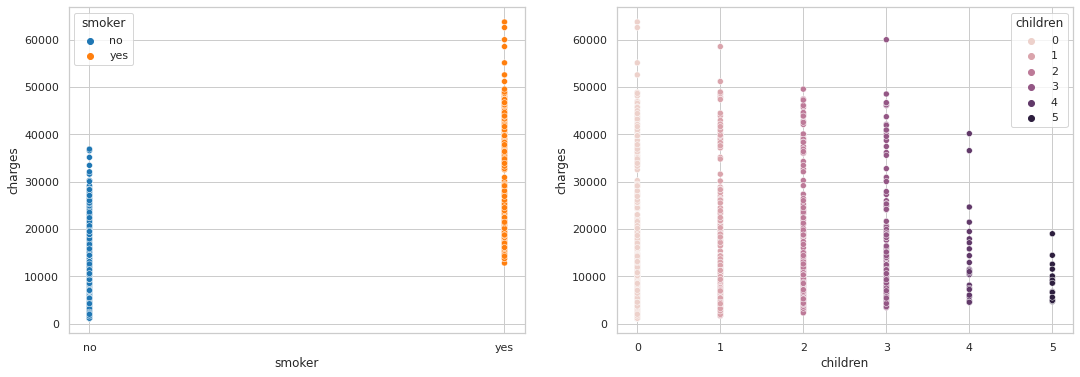

In [304]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.scatterplot(ax=ax[0], data=df, x='smoker', y='charges', hue='smoker')
sns.scatterplot(ax=ax[1], data=df, x='children', y='charges', hue='children')

## Boxplots and Violinplots

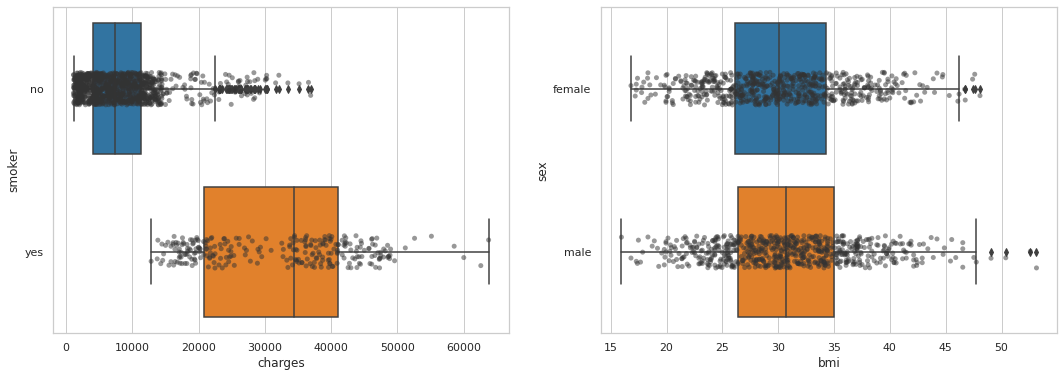

In [305]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.boxplot(ax=ax[0], data=df,x='charges',y='smoker')
sns.stripplot(ax=ax[0], data=df, x='charges', y='smoker', color='.2',alpha=.5)

sns.boxplot(ax=ax[1], data=df,x='bmi',y='sex')
sns.stripplot(ax=ax[1], data=df, x='bmi', y='sex', color='.2',alpha=.5)

plt.show()

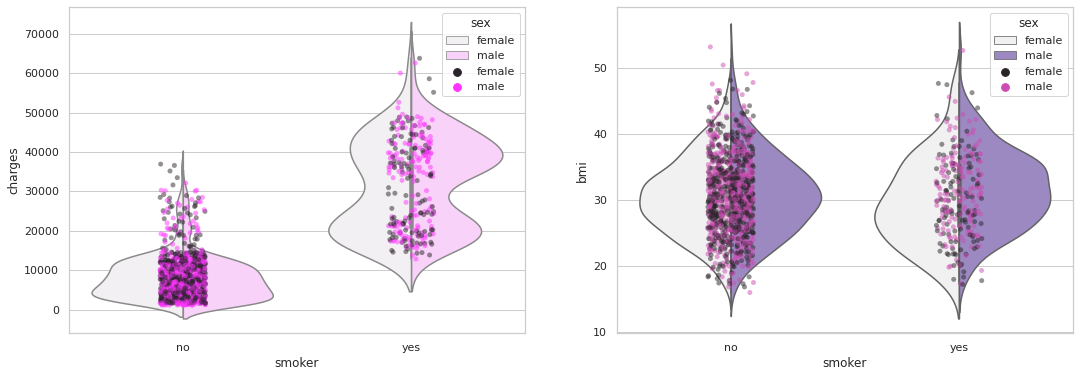

In [306]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.violinplot(ax=ax[0], data=df, x='smoker', y='charges', hue='sex', color=(1,.8,1), split=True)
sns.stripplot(ax=ax[0], data=df, x='smoker', y='charges', hue='sex', color=(1,.2,1), alpha=.5)

sns.violinplot(ax=ax[1], data=df, x='smoker', y='bmi', hue='sex', color=(.6,.5,.8), split=True)
sns.stripplot(ax=ax[1], data=df, x='smoker', y='bmi', hue='sex', color=(.8,.3,.7), alpha=.5)

## Correlation

In [307]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


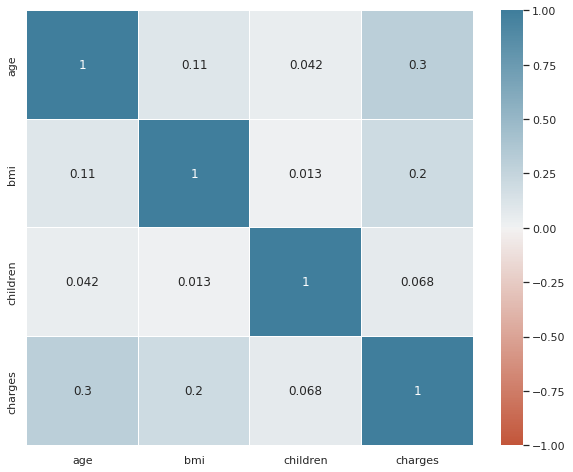

In [308]:
sns.heatmap(data=df.corr(), cmap=sns.diverging_palette(20,230, as_cmap=True), center=0, vmin=-1, vmax=1, linewidth=.1, annot=True)

### Represent categorical variable as discrete numeric variable

In [309]:
df = (
    df
    .assign(numeric_smoker = lambda df: df.smoker.replace(['yes', 'no'], [1, 0]))
)

In [310]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,numeric_smoker
0,19,female,27.90,0,yes,southwest,16884.9240,1
1,18,male,33.77,1,no,southeast,1725.5523,0


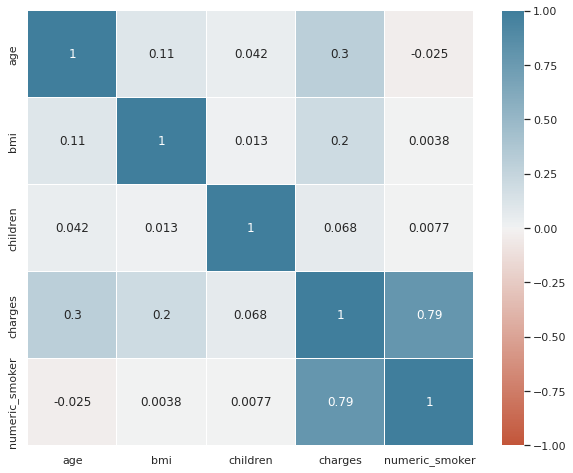

In [311]:
sns.heatmap(data=df.corr(), cmap=sns.diverging_palette(20,230, as_cmap=True), center=0, vmin=-1, vmax=1, linewidth=.1, annot=True)

## Simple Regression Analysis

LinregressResult(slope=9.98777190665239e-05, intercept=29.337977354094626, rvalue=0.19834096883362895, pvalue=2.4590855351166567e-13, stderr=1.3503240560667263e-05, intercept_stderr=0.24255025485962012)


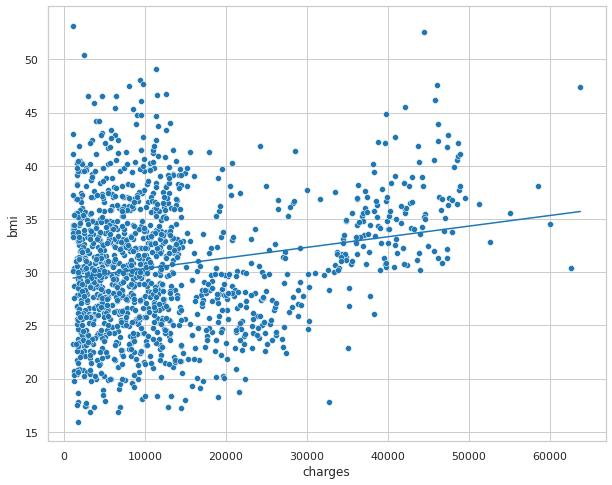

In [312]:
charges_bmi = scipy.stats.linregress(x=df.charges, y=df.bmi)
print(charges_bmi)

sns.scatterplot(data=df,x='charges', y='bmi')

fx_1 = np.array([df.charges.min(), df.charges.max()])
fy_1 = charges_bmi.intercept + charges_bmi.slope * fx_1

plt.plot(fx_1, fy_1)
plt.show()

### Charges and age Regplot

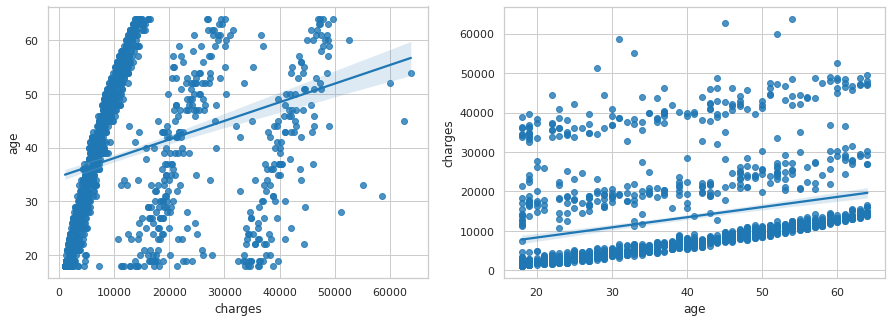

In [313]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.regplot(
    ax=ax[0],
    data=df,
    x='charges',
    y='age'
)
# x and y variables inverted
sns.regplot(
    ax=ax[1],
    data=df,
    x='age',
    y='charges'
)

## Logistic Regression

In [314]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,numeric_smoker
0,19,female,27.90,0,yes,southwest,16884.9240,1
1,18,male,33.77,1,no,southeast,1725.5523,0


In [330]:
is_smoker = smf.logit(formula='numeric_smoker ~ charges + C(sex)', data=df).fit()

is_smoker.params

Optimization terminated successfully.
         Current function value: 0.187847
         Iterations 8


Intercept        -5.811595
C(sex)[T.male]    0.234010
charges           0.000253
dtype: float64

In [331]:
is_smoker_predictions = pd.DataFrame(dict(
        actual_smoker = df.numeric_smoker,
        predicted_values = is_smoker.predict().round()
    )
)
is_smoker_predictions.head()

,actual_smoker,predicted_values
0,1,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [334]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [333]:
(
    is_smoker_predictions
    .value_counts(['actual_smoker', 'predicted_values'])
    .reset_index(name='count')
)

,actual_smoker,predicted_values,count
0,0,0.0,1018
1,1,1.0,189
2,1,0.0,85
3,0,1.0,46


In [336]:
print(
    sklearn.metrics.confusion_matrix(
        is_smoker_predictions.actual_smoker,
        is_smoker_predictions.predicted_values,
    )
)
print('Accuracy:', sklearn.metrics.accuracy_score(
    is_smoker_predictions.actual_smoker,
    is_smoker_predictions.predicted_values,
))

[[1018   46]
 [  85  189]]
0.9020926756352765


## Summary

In this dataset we explore the individual medical cost billed by health insurance. From the analysis of the data, we got the following insights:

* There's a high correlation between *charge* and *smoker*. People who smoke turn out to be most expensive for health insurance.
* There's correlation betwen *age* and *charge*. There´s more charge as people gets older. But the amount of change is not significantly high.

In general termns, there are two big clusters of datapoints in this dataset.

* The non smoker people cluster have a mean charge of 8434 and a standard deviation of 5993.
* The smoker people cluster have a mean charge of 32050 and a standard deviation of 11541.
* Both clusters are skewed to the right.